In [1]:
# We can follow the recipe at 
# https://towardsdatascience.com/creating-bar-chart-race-animation-with-python-cdb01144074e
# for generating bar chart race animations.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
counties = pd.read_csv("us-counties.csv")

In [3]:
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [4]:
d = pd.to_datetime(counties["date"])
counties["date"] = d
# Note, I'm overwriting the data by reformatting it here.

In [5]:
counties[np.isnan(counties.deaths)] =0
counties[np.isnan(counties.fips)] = 999999
counties["fips"] = counties.fips.astype(np.int64)
# Fix missing data for NYC and PR, two largest missing-fips-code county-like-areas.
counties.loc[counties.county == "New York City","fips"] = 36998
counties.loc[counties.state == "Puerto Rico","fips"] = 72999

febdata = counties.loc[np.where(counties.date ==np.datetime64("2021-01-31"))]
cookco = counties.loc[np.where( counties.fips == 17031)]
deathsbycounty = febdata.sort_values("deaths")

In [6]:
# This table purports to assemble 2020 census data in a usable table
# https://github.com/nytimes/covid-19-data/issues/180
population = pd.read_json("https://raw.githubusercontent.com/Zoooook/CoronavirusTimelapse/master/static/population.json")
population["fips"] = population.us_county_fips.astype(np.int64)
deathswithpop= counties.merge(population, on="fips")
deathswithpop.head()

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population
0,2020-01-21 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN
1,2020-01-22 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN
2,2020-01-23 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN
3,2020-01-24 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN
4,2020-01-25 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN


In [7]:
deathswithpop["countystate"] = deathswithpop.county+","
deathswithpop.head(1)

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,countystate
0,2020-01-21 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN,"Snohomish,"


In [8]:
deathswithpop["countystate"] = deathswithpop.county+","+deathswithpop.state
deathswithpop.head(1)

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,countystate
0,2020-01-21 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN,"Snohomish,Washington"


In [9]:
deathswithpop.head()

,date,county,state,fips,cases,deaths,us_state_fips,us_county_fips,population,region,subregion,nyt_population,countystate
0,2020-01-21 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN,"Snohomish,Washington"
1,2020-01-22 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN,"Snohomish,Washington"
2,2020-01-23 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN,"Snohomish,Washington"
3,2020-01-24 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN,"Snohomish,Washington"
4,2020-01-25 00:00:00,Snohomish,Washington,53061,1,0.0,53,53061,786620,Washington,Snohomish,NaN,"Snohomish,Washington"


In [10]:
len(deathswithpop)

1811736

In [11]:
pivot = deathswithpop.pivot_table(values= "deaths", index="date", columns="countystate")

In [12]:
pivot.head()

countystate,"Abbeville,South Carolina","Acadia,Louisiana","Accomack,Virginia","Ada,Idaho","Adair,Iowa","Adair,Kentucky","Adair,Missouri","Adair,Oklahoma","Adams,Colorado","Adams,Idaho",...,"York,South Carolina","York,Virginia","Young,Texas","Yuba,California","Yukon-Koyukuk Census Area,Alaska","Yuma,Arizona","Yuma,Colorado","Zapata,Texas","Zavala,Texas","Ziebach,South Dakota"
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pivot.shape

(651, 3133)

In [14]:
pivot.fillna(0, inplace=True)
pivot.head(1)

countystate,"Abbeville,South Carolina","Acadia,Louisiana","Accomack,Virginia","Ada,Idaho","Adair,Iowa","Adair,Kentucky","Adair,Missouri","Adair,Oklahoma","Adams,Colorado","Adams,Idaho",...,"York,South Carolina","York,Virginia","Young,Texas","Yuba,California","Yukon-Koyukuk Census Area,Alaska","Yuma,Arizona","Yuma,Colorado","Zapata,Texas","Zavala,Texas","Ziebach,South Dakota"
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pivot.sum(axis=1)

date
2020-01-21         0.0
2020-01-22         0.0
2020-01-23         0.0
2020-01-24         0.0
2020-01-25         0.0
                ...   
2021-10-28    702052.0
2021-10-29    703848.0
2021-10-30    704140.0
2021-10-31    705131.0
2021-11-01    706244.0
Length: 651, dtype: float64

In [16]:
pivot["sum"] = pivot.sum(axis=1)

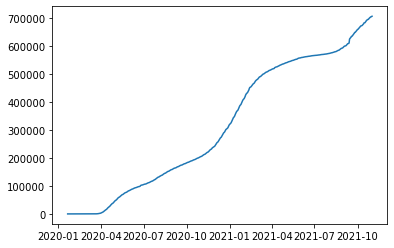

In [17]:
# Seeing that number 700,000 makes me want to sneak a line plot
plt.plot( pivot["sum"])

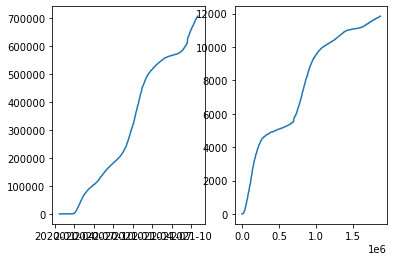

In [19]:
# I have to admit this is "less than reassuring" in general.  
plt.subplot(121)
plt.plot( pivot["sum"])
plt.subplot(122)
plt.plot(cookco.deaths)

In [20]:
pivot.sum(axis=0)

countystate
Abbeville,South Carolina        14382.0
Acadia,Louisiana                80396.0
Accomack,Virginia               18029.0
Ada,Idaho                      181019.0
Adair,Iowa                       9941.0
                               ...     
Yuma,Colorado                    5412.0
Zapata,Texas                    11212.0
Zavala,Texas                    15408.0
Ziebach,South Dakota             3098.0
sum                         205583342.0
Length: 3134, dtype: float64

In [ ]:
# What's with Ada Co, ID?  These are sums of the cumulative deaths -- not very meaningful.

In [ ]:
# A recipe for generating "bar chart races" in python:
# https://towardsdatascience.com/creating-bar-chart-race-animation-with-python-cdb01144074e

In [21]:
# Make a set of the counties that ever make the top N
N = 10
top_counties = set()
for index, row in pivot.iterrows():
    top_counties = top_counties.union(set(row.sort_values(ascending=False).head(N).index))

In [23]:
top_counties
len(top_counties)

49

In [24]:
top_counties.remove("sum")

In [25]:
top_counties

{'Bergen,New Jersey',
 'Chelan,Washington',
 'Clark,Nevada',
 'Clark,Washington',
 'Cook,Illinois',
 'Davison,South Dakota',
 'Dougherty,Georgia',
 'El Paso,Colorado',
 'Essex,New Jersey',
 'Fairfield,Connecticut',
 'Gentry,Missouri',
 'Gilmer,West Virginia',
 'Glades,Florida',
 'Gladwin,Michigan',
 'Glascock,Georgia',
 'Glasscock,Texas',
 'Glenn,California',
 'Gloucester,New Jersey',
 'Gloucester,Virginia',
 'Glynn,Georgia',
 'Gogebic,Michigan',
 'Grand Forks,North Dakota',
 'Grand Traverse,Michigan',
 'Harris,Texas',
 'James City,Virginia',
 'Jefferson,Louisiana',
 'King,Washington',
 'Lee,Florida',
 'Los Angeles,California',
 'Maricopa,Arizona',
 'Miami-Dade,Florida',
 'Middlesex,Massachusetts',
 'Nassau,New York',
 'Oakland,Michigan',
 'Orange,California',
 'Orleans,Louisiana',
 'Philadelphia,Pennsylvania',
 'Placer,California',
 'Riverside,California',
 'Sacramento,California',
 'San Bernardino,California',
 'Santa Clara,California',
 'Santa Rosa,Florida',
 'Snohomish,Washington',

In [26]:
top_county_df = pivot[top_counties]

In [28]:
top_county_df.shape 

(651, 48)

In [29]:
import bar_chart_race as bcr

In [30]:
bcr.bar_chart_race(df = top_county_df[::60], 
                   n_bars = 10, 
                   sort='desc',
                   title='Cumulative deaths from COVID by county',
                   filename = 'barchartrace.mp4')


/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


In [ ]:
# This took a long time to render for me, so let me plot only every 60th point --2 month intervals.
bcr.bar_chart_race(df = top_county_df[::60], 
                   n_bars = 10, 
                   sort='desc',
                   title='Cumulative deaths from COVID by county',
                   filename = 'barchartrace.mp4')
# This runs too fast.  NYC is conspicuously missing.

In [31]:
bcr.bar_chart_race(df = top_county_df[::14], 
                   n_bars = 10, 
                   sort='desc',
                   title='Cumulative deaths from COVID by county',
                   filename = 'barchartrace-biweekly.mp4')

/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


In [38]:
bcr.bar_chart_race(df = top_county_df.diff().fillna(0)[::14], 
                   n_bars = 10, 
                   sort='desc',
                   title='Cumulative deaths from COVID by county',
                   filename = 'barchartrace-biweeklyCURRENT.mp4')

/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


In [40]:
bcr.bar_chart_race(df = top_county_df.diff().fillna(0)[:200:1], 
                   n_bars = 10, 
                   sort='desc',
                   title='Cumulative deaths from COVID by county',
                   filename = 'barchartrace-daily.mp4')

/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
/Applications/anaconda3/lib/python3.8/site-packages/bar_chart_race/_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


[]

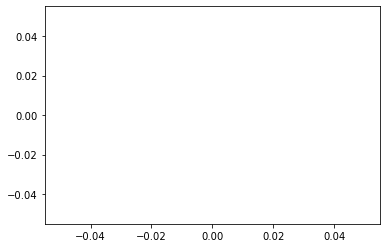

In [41]:
plt.plot()

In [36]:
top_county_df.diff()[::14]

countystate,"Glasscock,Texas","Glenn,California","Gilmer,West Virginia","Dougherty,Georgia","San Bernardino,California","Maricopa,Arizona","Philadelphia,Pennsylvania","Glades,Florida","Lee,Florida","Gladwin,Michigan",...,"Suffolk,New York","Grand Forks,North Dakota","Orange,California","Gloucester,New Jersey","Miami-Dade,Florida","Wayne,Michigan","Chelan,Washington","Orleans,Louisiana","Glascock,Georgia","Snohomish,Washington"
date,,,,,,,,,,,,,,,,,,,,,
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
2020-03-31,0.0,0.0,0.0,8.0,3.0,3.0,7.0,1.0,2.0,0.0,...,9.0,0.0,3.0,1.0,3.0,37.0,0.0,15.0,0.0,2.0
2020-04-14,0.0,0.0,0.0,0.0,0.0,2.0,79.0,0.0,1.0,0.0,...,37.0,0.0,0.0,2.0,34.0,60.0,0.0,32.0,0.0,4.0
2020-04-28,0.0,0.0,0.0,4.0,3.0,15.0,32.0,0.0,3.0,0.0,...,32.0,0.0,2.0,5.0,22.0,60.0,0.0,4.0,0.0,0.0
2020-05-12,0.0,0.0,0.0,1.0,0.0,9.0,15.0,0.0,1.0,0.0,...,15.0,0.0,2.0,7.0,15.0,35.0,1.0,7.0,0.0,1.0


In [ ]:
# This is more acceptable.
bcr.bar_chart_race(df = top_county_df[::7], 
                   n_bars = 10, 
                   sort='desc',
                   title='Cumulative deaths from COVID by county',
                   filename = 'barchartrace-weekly.mp4')

In [ ]:
list(pivot.columns)

In [ ]:
"New York, New York" in list(pivot.columns)


In [ ]:
"New York City, New York" in list(pivot.columns)


In [ ]:
deathswithpop.sort_values("deaths").head()

In [ ]:
deathswithpop.sort_values("deaths", ascending=False).head()

In [ ]:
deathswithpop.loc[np.where(deathswithpop.fips == 999999)].sort_values("deaths", ascending=False).head()

In [ ]:
# Ok.  NYC didn't survive the merge. 
